<a href="https://colab.research.google.com/github/thePowe/BMI-Calculator/blob/main/predicting_house_prices_regression_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Import necessary libraries

In [42]:
import pandas as pd
import numpy as np

In [43]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [44]:
# import the regressors
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Functions to Evaluate the machine learning models

In [5]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    This function takes model: Regressor, X_train, y_train, X_test, y_test

    and returns the 
    """
    # train
    model.fit(X_train, y_train)
    # predict
    y_pred = model.predict(X_test)
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    #calculate MAE
    mae = mean_absolute_error(y_test, y_pred)
    #calculate R-Squared
    r2 = r2_score(y_test, y_pred)
    # calculate RMSE
    rmse = np.sqrt(mse)
    return mse, mae, r2, rmse, model, y_pred
    # return rmse

In [6]:
def evaluate_regressors_rmses(regressors, regressor_names, X_train, y_train, X_test, y_test):
    # evaluate the models and compute their RMSE on the test data

    rmses = [evaluate_model(regressor, X_train, y_train, X_test, y_test)[3] for regressor in regressors]
    
    # create a dictionary mapping the names of the regressors to their RMSE
    regressor_rmses = dict(zip(regressor_names, rmses))
    
    # convert the dictionary to a pandas dataframe
    df = pd.DataFrame.from_dict(regressor_rmses, orient='index')
    
    # reset the index of the dataframe
    df = df.reset_index()
    
    # rename the columns of the dataframe
    df.columns = ['regressor_name', 'rmse']
    
    # sort the dataframe by RMSE in ascending order
    return df.sort_values('rmse', ignore_index=True)

### Class to plot graph

In [7]:
class Plots:
  def __init__(self, truth, prediction):
     self.truth = truth
     self.prediction = prediction

  def make_plot(self):
    plt.plot(self.truth, color="red", label="truth")
    plt.plot(self.prediction, color="blue", label="predicted")
    plt.legend()
    plt.grid()
    plt.title("Comparing truth and predicted regression values")
    plt.tight_layout()
    plt.show()

  def scatter(self):
    plt.scatter(self.truth, self.prediction, color="blue")
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

### Read the Datasets

In [8]:
housing_train_data = pd.read_csv('/content/drive/MyDrive/msc_training_dataset.csv')
housing_test_data = pd.read_csv('//content/drive/MyDrive/msc_testing_dataset.csv') 


In [9]:
housing_train_data.shape

(3000, 12)

### View the first 5 rows of the datasets.

In [10]:
housing_train_data.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [11]:
housing_test_data.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


### Handling Duplicates in the dataset

In [12]:
housing_train_data.duplicated().sum()

488

In [13]:
housing_train_data.drop_duplicates(inplace=True)

In [14]:
housing_test_data.duplicated().sum()

70

In [15]:
housing_test_data.drop_duplicates(inplace=True)

### Summary statistics of both datasets

Summary of the dataset.

In [16]:
housing_train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
room,2512.0,2.991242,1.424568,1.0,2.0,3.0,4.0,5.0
bathroom,2512.0,1.495223,0.500077,1.0,1.0,1.0,2.0,2.0
kitchen,2512.0,1.510748,0.499984,1.0,1.0,2.0,2.0,2.0
french_door,2512.0,2.001194,0.813809,1.0,1.0,2.0,3.0,3.0
backyard,2512.0,0.491640,0.500030,0.0,0.0,0.0,1.0,1.0
furnished,2512.0,0.492834,0.500048,0.0,0.0,0.0,1.0,1.0
green_paint,2512.0,0.490446,0.500008,0.0,0.0,0.0,1.0,1.0
solar_power,2512.0,0.493232,0.500054,0.0,0.0,0.0,1.0,1.0
woodfloor,2512.0,0.508758,0.500023,0.0,0.0,1.0,1.0,1.0
qlm_security,2512.0,0.486863,0.499927,0.0,0.0,0.0,1.0,1.0


Check the data types of the columns for the dataset.

In [17]:
housing_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          2512 non-null   int64
 1   bathroom      2512 non-null   int64
 2   kitchen       2512 non-null   int64
 3   french_door   2512 non-null   int64
 4   backyard      2512 non-null   int64
 5   furnished     2512 non-null   int64
 6   green_paint   2512 non-null   int64
 7   solar_power   2512 non-null   int64
 8   woodfloor     2512 non-null   int64
 9   qlm_security  2512 non-null   int64
 10  club_access   2512 non-null   int64
 11  price         2512 non-null   int64
dtypes: int64(12)
memory usage: 255.1 KB


In [18]:
housing_train_data['price'].describe()

count     2512.000000
mean      8609.211783
std       2222.006893
min       2235.000000
25%       7005.000000
50%       8615.000000
75%      10197.500000
max      15035.000000
Name: price, dtype: float64

In [19]:
#exp.describe()

Summary of the test dataset.

In [20]:
housing_test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
room,929.0,3.001076,1.413070,1.0,2.0,3.0,4.0,5.0
bathroom,929.0,1.502691,0.500262,1.0,1.0,2.0,2.0,2.0
kitchen,929.0,1.496233,0.500255,1.0,1.0,1.0,2.0,2.0
french_door,929.0,1.959096,0.811054,1.0,1.0,2.0,3.0,3.0
backyard,929.0,0.504844,0.500246,0.0,0.0,1.0,1.0,1.0
furnished,929.0,0.475780,0.499682,0.0,0.0,0.0,1.0,1.0
green_paint,929.0,0.519914,0.499872,0.0,0.0,1.0,1.0,1.0
solar_power,929.0,0.491927,0.500204,0.0,0.0,0.0,1.0,1.0
woodfloor,929.0,0.506997,0.500220,0.0,0.0,1.0,1.0,1.0
qlm_security,929.0,0.500538,0.500269,0.0,0.0,1.0,1.0,1.0


### Modeling and Evaluation

### Split Data

In [21]:
train_X = housing_train_data.drop('price', axis=1)
test_X = housing_test_data.drop('price', axis=1)
train_Y = housing_train_data['price']
test_Y = housing_test_data['price']

In [22]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=4)
# mae_train = []
# mae_test = []
# for train_index, test_index in kf.split(housing_train_data):
    
#    train_X, test_X = housing_train_data.iloc[train_index], housing_train_data.iloc[test_index]
#    train_Y, test_Y = housing_test_data.iloc[train_index], housing_test_data.iloc[test_index]

In [23]:
train_X.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access
0,3,1,2,1,1,0,1,0,0,1,1
1,5,2,2,2,1,0,0,0,0,1,1
3,1,2,1,2,0,0,0,0,1,1,0
4,2,1,2,3,1,1,0,0,1,1,0
5,5,1,2,1,0,0,1,0,1,0,0


In [24]:
train_Y

0       6835
1       9005
3       5105
4       9105
5       8995
        ... 
2993    4815
2995    4825
2996    6755
2997    7565
2998    9135
Name: price, Length: 2512, dtype: int64

In [25]:
# Now we are ready to do regression. We want to predict the price.

In [26]:
# Now let's do random forest regression
# from sklearn.ensemble import RandomForestRegressor
# rf_reg = RandomForestRegressor().fit(train_X, train_Y)
# rf_predicted = rf_reg.predict(test_X)
# print(rf_reg.score(train_X, train_Y))
# print(mean_absolute_error(test_Y, rf_predicted))

### initializing the regressors

In [27]:
# initialize the regressors
linear_regressor = LinearRegression()

xgb_reg =  XGBRegressor()
polynomial_features = PolynomialFeatures(degree=2)
polynomial_regressor = Pipeline([("polynomial_features", polynomial_features),
("linear_regression", linear_regressor)])
ridge_regressor = Ridge()
lasso_regressor = Lasso()
elastic_net_regressor = ElasticNet()
decision_tree_regressor = DecisionTreeRegressor()
random_forest_regressor = RandomForestRegressor()
boosted_tree_regressor = GradientBoostingRegressor()
neural_network_regressor = MLPRegressor()
support_vector_regressor = SVR()
grad_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, loss='ls')
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform')
spline_regressor = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [28]:
# "Initialized regressors placed into a list"
regressors = [linear_regressor, polynomial_regressor, ridge_regressor, lasso_regressor, elastic_net_regressor, 
              decision_tree_regressor, random_forest_regressor, boosted_tree_regressor, neural_network_regressor, 
              support_vector_regressor, knn_regressor, spline_regressor, xgb_reg]

# collected names of regressors 
regressor_names = ["Linear Regression", "Polynomial Regression", "Ridge Regression", "Lasso Regression", 
                   "Elastic Net Regression", "Decision Tree Regression", "Random Forest Regression", 
                   "Boosted Tree Regression", "Neural Network Regression", "Support Vector Regression", 
                   "K-Nearest Neighbour Regression", "Spline Regression", 'XGB']

### Evaluation of Model

In [29]:
evaluate_regressors_rmses(regressors, regressor_names, train_X, train_Y, test_X, test_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,regressor_name,rmse
0,Spline Regression,13.000000
1,Linear Regression,13.000000
2,Polynomial Regression,13.000000
3,Ridge Regression,13.234518
4,Lasso Regression,14.412193
5,XGB,79.677420
6,Boosted Tree Regression,123.931694
7,Random Forest Regression,225.113341
8,Decision Tree Regression,333.764387
9,K-Nearest Neighbour Regression,575.107168


Random Forest Evaluation

In [30]:
mse, mae, r2, rmse, rf_model, y_pred = evaluate_model(random_forest_regressor, train_X, train_Y, test_X, test_Y)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2}")


MSE: 51147.34
MAE: 173.20
RMSE: 226.16
R-squared: 0.9897060245224404


eXtreme Gradient Boost

In [31]:
mse, mae, r2, rmse, _model, xgb_pred = evaluate_model(xgb_reg, train_X, train_Y, test_X, test_Y)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2}")

MSE: 6348.49
MAE: 59.60
RMSE: 79.68
R-squared: 0.9987222950899985


converts the predicted prices to CSV file

In [32]:
pd.DataFrame(xgb_pred, columns=["Predicted Price"]).to_csv("predicted_prices.csv", index=False)

### Visualization

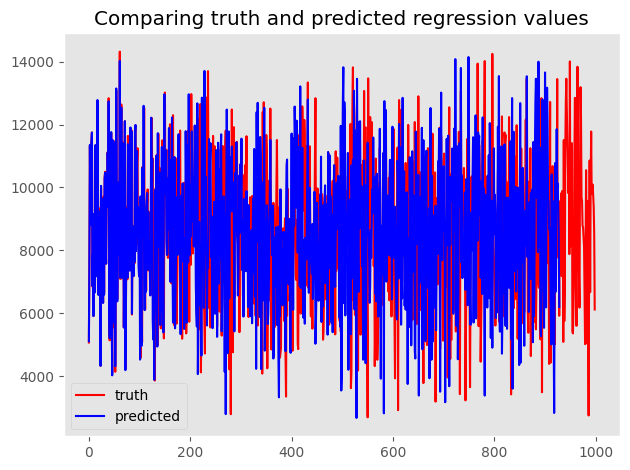

In [37]:
make_plot = Plots(test_Y, xgb_pred)
make_plot.make_plot()

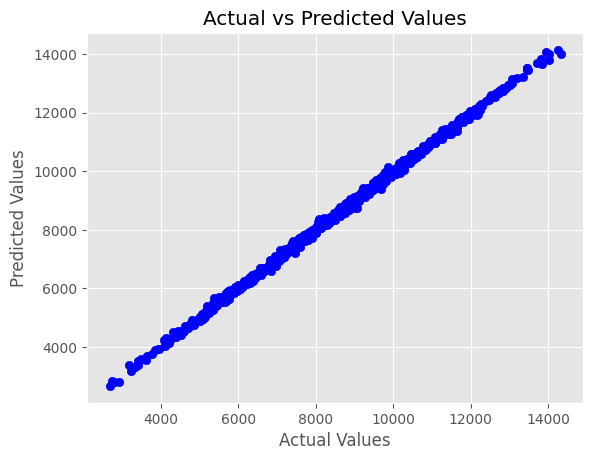

In [38]:
make_plot.scatter()

In [35]:
housing_train_data.columns

Index(['room', 'bathroom', 'kitchen', 'french_door', 'backyard', 'furnished',
       'green_paint', 'solar_power', 'woodfloor', 'qlm_security',
       'club_access', 'price'],
      dtype='object')

### Feature Importance


Feature Importances with XGBoost:
0.28871346 room
0.27646855 furnished
0.21538217 woodfloor
0.104491316 solar_power
0.026979461 club_access
0.019012582 backyard
0.017987717 kitchen
0.015778096 qlm_security
0.013372463 green_paint
0.010991534 bathroom
0.010822636 french_door


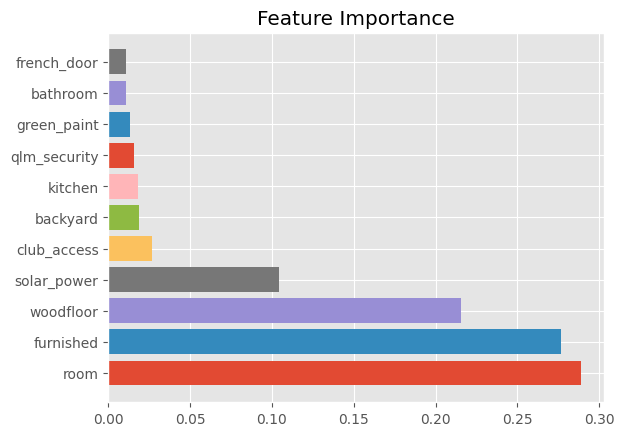

In [36]:
xgb_importances = xgb_reg.feature_importances_
xgb_ranks_and_features = zip(xgb_importances, train_X.columns)
xgb_ranks_and_features = sorted(xgb_ranks_and_features,reverse=True)
print("\nFeature Importances with XGBoost:")
for x, y in xgb_ranks_and_features:
    print(x, y)
    plt.title('Feature Importance')
    plt.barh(y,x)